In [3]:
import numpy as np
import pandas as pd

## Week 5

**PQ1**

Define a function cross_entropy(y,sigmoid_vector,w,reg_type,reg_rate) having the 
following characteristics: 

Input:

    y: Actual output label vector
    sigmoid_vector: logistic value of predicted output 
    w: weight vector
    reg_type: type of regularization as string, either 'l1' or 'l2'. Default 'l2'.
    reg_rate: regularization rate. Default value 0.

Output:

    Binary cross entropy loss(float value)

In [ ]:
def cross_entropy(y,sigmoid_vector,w,reg_type,reg_rate) :
    if(reg_type == "l1") :
        return np.sum(y * np.log(sigmoid_vector) + (1 -  y) * (np.log(1 - sigmoid_vector))) + (reg_rate * np.sum(np.abs(w)))
    else :
        return np.sum(y * np.log(sigmoid_vector) + (1 -  y) * (np.log(1 - sigmoid_vector))) + (reg_rate * np.sum(np.dot(w.T, w)))

**GQ1** 

Assume that we have trained a logistic regression classifier on a dataset and have learned the weight w. Define a function predict_label(X,w) which accepts a feature matrix X of test samples and the weight vector w as arguments, and assigns labels to each of the samples based on the following conditions:

- If the model's output is greater than or equal to 0.75, assign the predicted label as 1
- If the model's output is less than or equal to 0.25, assign the predicted label as -1
- Otherwise, assign the label as 0

The function should return the vector of predicted labels. Use the sigmoid activation function while calculating the model's output for all the sample values in the test-set.

In [ ]:
def predict_label(X, w) :
    y_hat = 1/(1+np.exp(-(X @ w)))
    labels=[]
    # compute label of the sample
    for y in y_hat:
        if y<=0.25:
            label=-1
        elif y>=0.75:
            label=1
        else:
            label=0
        labels.append(label)
    return np.array(labels)

**GQ2**

Define a function gradient(X, y, w, reg_rate) which can be used for optimization of logistic regression model with L2 regularization having the following characteristics:
Input:

    X: Feature matrix for training data.
    y: Label vector for training data.
    reg_rate: regularization rate
    w: weight_vector

Output:

     A vector of gradients.



In [ ]:
def gradient(X, y, w, reg_rate) :
    grad = X.T @ (sigmoid(X @ w) - y) + (reg_rate * w)

def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

**GQ3**

Define a function update_w(X, y, w, reg_rate, lr) which can be used for optimization of logistic regression model with L2 regularization having following characteristics:
Input:

    X: Feature matrix for training data.
    y: Label vector for training data.
    reg_rate: regularization rate
    w: weight_vector
    lr: learning rate

Output:

     A vector of updated weights.

You need to perform exactly one update over the entire data.

In [ ]:
def update_w(X, y, w, reg_rate, lr) :
    grad = X.T @ (sigmoid(X @ w) - y) + (reg_rate * w)
    w = w - lr * grad
    return w

In [ ]:
class LogisticRegression() :
    
    def __init__(self, w) :
        self.w = w
        
    def sigmoid(z) :
        return 1 / (1 + np.exp(-z))
    
    def linear_combination(self, X) :
        return X @ self.w

    def activation(self, X) :
        return self.sigmoid(self.linear_combination(X))
    
    def predict(self, X, threshold=0.5) :
        return np.where(self.activation(X) > threshold, 1, 0)
    
    def calucate_gradient(self, X, y, reg_rate) :
        return X.T @ (self.sigmoid(X @ w) - y) + (reg_rate * w)
            
    def update_weights(self, X, y, reg_rate, lr) :
        grad = calculate_gradient(X, y, reg_rate)
        self.w = self.w - lr *  grad
        
    def loss(self, X, y, reg_rate) :
        sigmoid_vector = self.activation(X)
        l = np.sum((y * np.log(sigmoid_vector) + (1 - y) * (np.log(1 - sigmoid_vector)))) + 
        r = 0.5 * (reg_rate * np.sum(np.dot(w.T, w)))
        l += r
        return l
        
    def gd(self, X, y, epochs, reg_rate, lr) :
        self.w = np.zeros(y.shape[0])
        self.w_all = []
        self.l_all = []
        
        for e in epochs :
            self.w = self.caclulate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.l_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(X, y, reg_rate, lr)

        return self.w

## Week 6

**PQ1**

or a binary classification problem, where the feature vector x = (x1,x2) is a two-dimensional binary vector, i.e., each feature is binary. The class label y is indexed using 1 and 2. 
Assume that the features are conditionally independent given the class labels. Train a Bernoulli Naive-Bayes classifier for this data. Specifically, estimate the following parameter matrix:
P = \begin{bmatrix} p_{11} & p_{12}\\ p_{21} & p_{22} \end{bmatrix}

This matrix is to be understood as follows. For features x1 and x2
$$
    p_{ij} = P(x_{i} = 1 ∣ y = j)
$$

In $p_{ij}$, the first index stands for the feature and the second stands for the class-label.

Write a function named bernoulli_naive_bayes that accepts a feature matrix X and a label vector y as arguments. It should return the parameter matrix P. Both the arguments and the return value are of type np.ndarray. You can assume that no smoothing is required.

In [ ]:
def bernoulli_naive_bayes(X, y):
    
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    p11 = len(np.where((x1 == 1) & (y == 1))[0]) / len(np.where(y == 1)[0])
    p12 = len(np.where((x1 == 1) & (y == 2))[0]) / len(np.where(y == 2)[0])
    p21 = len(np.where((x2 == 1) & (y == 1))[0]) / len(np.where(y == 1)[0])
    p22 = len(np.where((x2 == 1) & (y == 2))[0]) / len(np.where(y == 2)[0])
    
    P = np.array([[p11, p12], [p21, p22]])
    return P

**PQ2**

You are given a numerical data matrix xxx as an np.ndarray (shape 200×5) and a vector of class labels yyy (size 200) as np.ndarray for a multi-class classification problem. Define a function mean_estimate which calculates the estimated mean of data samples corresponding to the class labels for each feature and returns a dictionary with class labels as keys and estimated mean vectors as values. The ith element of a mean vector corresponds to the ith feature.

In [ ]:
def mean_estimate(X: np.ndarray,  y : np.ndarray):
    D = {}
    labels = np.unique(y)
    for label in labels:
        D[label] = np.mean(X[y == label], axis = 0)
    return D

**PQ4**

For a binary classification problem with class labels (0 and 1), define a function class_scores that accepts the true and predicted labels and returns the following evaluation metrics as a dictionary.
(1) Precision
(2) Recall
(3) Accuracy
(4) F1 score
(5) Misclassification Rate
They keys of the dictionary are the names of the metrics, exactly as they are given above. The values are the corresponding measurements expressed as floats. The function should have the following signature:

Arguments:  
    y_test: true labels, (n, ), np.ndarray 
    y_pred: predicted labels, (n, ), np.ndarray
Return:
    metrics: dictionary
        key: string, names of the metrics
        value: float

Both numpy arrays are of size (n,)(n, )(n,). Do not use any existing methods/functions to calculate the same. Consider label 1 as the positive class. Note that the misclassification rate is 1 minus the accuracy.

In [ ]:
def class_scores(y_test: np.ndarray, y_pred: np.ndarray):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(0, len(y_test)) :
        if(y_test[i] == 1 and y_pred[i] == 1) :
            tp += 1
        if(y_test[i] == 0 and y_pred[i] == 1) :
            fp += 1
        if(y_test[i] == 0 and y_pred[i] == 0) :
            tn += 1
        if(y_test[i] == 1 and y_pred[i] == 0) :
            fn += 1
        
    acc = (tp + tn) / (tp + fp + fn + tn)
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    f1 = (2 * prec * rec) / (prec + rec)
    misclf_rate = 1 - acc
    
    return {
        "Accuracy" : acc,
        "Precision" : prec,
        "Recall" : rec,
        "F1 Score" : f1,
        "Misclassification Rate" : misclf_rate
    }

**GQ1**

In a multi-class classification setting, consider a numerical feature matrix XXX as an np.ndarray of shape (n,m)(n, m)(n,m) and a vector of class labels yyy of size (n,)(n, )(n,) as an np.ndarray. Define a function variance_estimate which calculates the estimated variance of data samples corresponding to individual class labels for each feature. The function should return a dictionary with class labels as keys and estimated variance vectors as values. The ith element of a vector corresponds to the variance of the ith feature.

In [ ]:
def variance_estimate(X: np.ndarray,  y: np.ndarray):
    D = {}
    labels = np.unique(y)
    for label in labels:
        D[label] = np.var(X[y == label], axis = 0)
    return D

In [ ]:
class BernoulliNB() :
    def __init__(self, alpha=1.0) :
        self.alpha = alpha
        
    def fit(self, X, y) :
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for c in range(n_classes) :
            X_c = X[y == c]
            self.w[c: ,] = (np.sum(X_c, axis=0) + self.alpha) / (X_c.shape[0] + n_classes * self.alpha)
            self.w_priors[c] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

            print("\nClass Conditional Density : \n", self.w)
            print("\nPrior : \n", self.w_priors)

        return self.w, self.w_priors
    
    def log_likelihood_prior_prod(self, X) :
        return X @ np.log(self.w.T) + (1 - X) @ np.log(1 - self.w.T) + np.log(self.w_priors.T)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)

    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)

In [ ]:
X = np.array([[1,0],[0,1],[0,1],[1,0]])
y = np.array([1,0,0,1])

bernoulli_nb = BernoulliNB()
print("FIT : ")
print(bernoulli_nb.fit(X, y))
print("\nPREDICT : ")
print(bernoulli_nb.predict(X)) # Note the prediction is matching with the input labels
print("\nLOG LIKELIHOOD PRIOR PROD : ")
print(bernoulli_nb.log_likelihood_prior_prod(X))
print("\nPREDICTED PROBABILITIES : ")
print(bernoulli_nb.predict_proba(X))


$$
    \mu_r = \frac {1}{n_r}\sum\limits_{i=1}^{n} \mathbb{1}(y^{(i)} = y_r)\textbf x^{(i)}
$$

$$
    \Sigma_{jjr}^{2} = \frac {1}{n_r}\sum\limits_{i=1}^{n} \mathbb{1}(y^{(i)} = y_r)(\textbf x^{(i)} - \mu_r)^{2}
$$


$$
    p(x_j | y_c; \mu_c, \Sigma_c) = \frac {1} {(2\pi)^{d/2}(|\Sigma_c|)^{1/2}} e^{\frac {1} {2} (\textbf x - \mu_c)^{T}\Sigma_c^{-1}(\textbf x - \mu_c)}
$$


In [13]:
class GaussianNB :
    
    def __init__(self, alpha=1.0) :
        self.alpha = alpha
    
    def fit(self, X, y) :
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        for ind, c in enumerate(self._classes) :
            X_c = X[y == c]
            
            self._mean[ind, :] = X_c.mean(axis=0)
            self._var[c] = X_c.var(axis=0)
            self._priors[ind] = X_c.shape[0] / float(n_samples)
            
        print("Mean:", self._mean)
        print("Variance:", self._var)
        print("Prior", self._priors)
        
            
    def _calc_pdf(self, class_ind, X) :
        mean = self._mean[class_ind]
        var = np.diag(self._var[class_ind])
        z = np.power(2 * np.pi, X.shape[0]/2) * np.power(np.linalg.det(var), 1/2)
        
        return (1/z) * np.exp(-0.5 * (X - mean).T @ (np.linalg.inv(var)) @ (X - mean))
    

    def _calc_prod_likelihood_prior(self, X):
        self.q = np.zeros((X.shape[0], len(self._classes)), dtype=np.float64)
        
        for x_ind, x in enumerate(X) :
            for c_ind, c in enumerate(self._classes) :
                
                # log(pdf) + log(priors) -> Similar to BernoulliNB
                self.q[x_ind, c] = (np.log(self._calc_pdf(c_ind, x)) + np.log(self._priors[c_ind]))
                
    def predict_proba(self, X) :
        self._calc_prod_likelihood_prior(X)
        return np.exp(self.q) / np.expand_dims(np.sum(np.exp(self.q), axis=1), axis=1)
    
    def predict(self, X) :
        self._calc_prod_likelihood_prior(X)
        return np.argmax(self.q, axis=1)

In [14]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100, n_features=2, centers=[[5,5],[10,10]], cluster_std=1.5, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

gaussian_nb = GaussianNB()
print("FIT : \n")
print(gaussian_nb.fit(X, y))
print("\nPREDICT : \n")
print(gaussian_nb.predict(X))

from sklearn.metrics import classification_report
print(classification_report(y_test, gaussian_nb.predict(X_test)))

FIT : 

Mean: [[ 4.55327074  5.13550586]
 [10.33985583 10.04486762]]
Variance: [[2.09245276 2.5775431 ]
 [3.36405042 2.13027877]]
Prior [0.5 0.5]
None

PREDICT : 

[0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0
 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [80]:
class MultinomialNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            # The only difference : ( between MultinomialNB and BernoulliNB )
            total_count = np.sum(np.sum(X_c, axis=1))
            self.w[idx, :] = (np.sum(X_c, axis=0) + self.alpha) / (total_count + n_classes * self.alpha)
            self.w_priors[idx] = (X_c.shape[0] + self.alpha) / (float(n_samples) + n_classes * self.alpha)

    def log_likelihood_prior_prod(self, X):
        return X @ (np.log(self.w).T) + np.log(self.w_priors)
    
    def predict_proba(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q) / np.expand_dims(np.sum(np.exp(q), axis=1), axis=1)
    
    def predict(self, X):
        q = self.log_likelihood_prior_prod(X)
        return np.argmax(q, axis=1)

## Week 7

**PQ1**

Write a function euclid(a,b) to find Euclidean distance between vectors a and b. Both a and b have shape (n,1), where n is number of features/dimensions.

Input: Vectors a and b
Output: Euclidean distance between vectors a and b

In [ ]:
def euclid(a,b) :
    return np.sqrt((a-b)**2, axis=1)

**PQ2**

Write a function **one_hot(y)** which performs one hot encoding on vector y and then outputs a resultant matrix which can be used for softmax regression as output label matrix. y is row matrix with (n,1) shape, where n is number of samples.
Example: if y is [8, 6, 3], its one hot encoding will be [[0, 0, 1],[0, 1, 0],[1, 0, 0]].

Input: y: A vector of shape (n,1)
Output: A output label matrix of suitable shape.

In [28]:
def one_hot1(y):
    val = set(y)
    ei = np.eye(max(val)+1)
    return ei[y]


# IF WE NEED TO CONVERT IT TO INTEGERS FIRST, USE THE FOLLOWING :

def one_hot2(y) :
    u = np.unique(y)
    idx = np.searchsorted(u, y.flatten())
    eye = np.eye(y.shape[0])
    return np.row_stack([eye[i] for i in idx.T])
    
a= np.array([8,6,3])
print(one_hot1(a))
print("\n", one_hot2(a))

[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]]

 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


**GQ1**
Write a function manhattan(a,b) to find Manhattan distance between vectors a and b. Both a and b are vectors with shape (n,1) where n is number of features/dimensions.

Input: Vectors a and b
Output: Manhattan distance between vectors a and b

In [ ]:
def manhattan(a,b) :
    return np.sum(np.abs(a-b))

**GQ2**

Write a function softmax(Z) to find softmax of linear combination of feature matrix and weight vector.
Take care of numerical stability as well.

Input: Z = X@W, where X is feature matrix of shape (n,m), W is weight matrix (m,k), where n = number of rows, m = number of features and k = number of labels.

Output: A matrix of (n,1) shape. Each row corresponds to the label of that row. Each label will have value from 0 to k-1.

In [ ]:
def softmax(Z) :
    s = np.exp(Z) / (np.sum(np.exp(Z)))

**GQ3**

Write a function knn(class1, class2, x_new) to find in which cluster x_new belongs using 3-NN. Assume cluster 1 and cluster 2 has 5 points each. Use Euclidian distance as distance measure.

Input: Two numpy arrays class1 and class2 of shape (5,2) each and a numpy array x_new of shape (2,1)
Output: Return class id to which x_new belongs (i.e. 1 or 2) .

In [ ]:
def euclid(a,b) :
    return np.sum((a-b)**2, axis=1).tolist()

def knn(class1, class2, x_new) :
    c = np.concatenate((class1,class2), axis=0)
    cl = []
    for i in range(2 * len(class1)) :
        if(i < len(class1)) :
            cl.append(1)
        else :
            cl.append(2)
    print(c)
    points = dict(zip(euclid(c, x_new), cl))    
    print("All points are ", points)

    least_3 = sorted(points.items())[:3]
    print(f"Points nearest to the new examples are {least_3}")
    
    return least_3

X1 = np.array([[5, 6],[5, 8],[3, 8]]) 
X2 = np.array([[2,4], [3,3], [4,2]])
ne = np.array([2,6])

knn(X1, X2, ne)

## Week 8

In [ ]:
def get_hyperplane_value(x,w,b, offset):
      return -1 * (w[0] * x + b + offset) / w[1]

In [ ]:
class fit_softSVM:
    def __init__(self, C=500):
        
        self._support_vectors = None 
        self.C = C 
        self.w = None 
        self.b = None 

        # n is the number of data points 
        self.n = 0
        # d is the number of dimensions 
        self.d = 0

    def _decision_function(self, X):
        return X.dot (self.w) + self.b
      
    def _cost(self, margin):
        return (1 / 2) * self.w.dot (self.w) + self.C * np.sum(np.maximum(0, 1 - margin))
 
    def _margin(self, X, y):
        return y * self._decision_function(X)
 
    def fit(self, X, y, lr=0.001, epochs=100):
        self.n, self.d = X.shape
        self.w = np.random.randn(self.d) 
        self.b = 0
        
        loss_array = []
        for _ in range ( epochs):
            margin = self._margin(X, y) 
            loss = self._cost(margin) 
            loss_array.append(loss)
            
            misclassified_pts_idx = np.where(margin < 1)[0]
            d_w = self.w - self.C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
            self.w = self.w - lr * d_w
        
            d_b = - self.C * np.sum(y[misclassified_pts_idx])
            self.b = self.b - lr * d_b
        
        self._support_vectors = np.where(self._margin(X, y) <= 1)[0]
        return self._support_vectors

def support_vectors(X_train, y_train):
    softSVM = fit_softSVM()
    support_vectors = softSVM.fit(X_train,y_train)

    return support_vectors

## Week 9

**PQ1**

Consider a regression problem with feature matrix X with size (100, 10) and label vector y with size (100, 1). We split this root node into two nodes 'node1' and 'node2' according to jth split variable and split value 's'.
Define a function `predict_node(X, y, j, s)` that takes X, y, split variable j and split value s as parameters and returns the tuple of predict values (mean value) at both the nodes.

X = ndarray of size (100, 10) with entries as float.

y = ndarray of size (100, 1) with entries as float.

j = int

s = float

In [ ]:
def predict_node(X, y, j, s):
    sep = X[:, j]
    region1 = y[np.where(sep <= s)]
    region2 = y[np.where(sep > s)]
    
    m1 = np.mean(region1)
    m2 = np.mean(region2)
    
    return (m1, m2)

**PQ2**

Define a function `predict_class(y)` that takes the parameter
`y` which is a ndarray of actual outputs of all the samples in a particualar node and retruns the predict class for the same node.

Note: number of classes are 10 (0 to 9). 

If two classes have same number of samples, function should return the lower class. 

In [ ]:
def predict_class(y):
    classes = np.unique(y)
    probs = []
    for c in classes :
        p = len(np.where(y == c)[0]) / len(y)
        probs.append(p)
    
    pred = classes[np.argmax(probs)]
    return pred

**PQ3**

Define a function `misclassification_error(y)`  that takes the parameter `y` which is a ndarray of actual outputs of all the samples in a particular node and return the misclassification error of the same node.

In [ ]:
def misclassification_error(y):
    classes = np.unique(y)
    probs = []
    for c in classes :
        p = len(np.where(y == c)[0]) / len(y)
        probs.append(p)
    return 1 - np.max(probs)

**GQ1**

Define a function `gini_index(dict)` having the 
following characteristics:

Input:
`dict` = dictionary that has classes as keys and 'number of samples in respective class' as values of a particular node.

Output:
Gini index of the same node. (A float value)

In [ ]:
def gini_index(data):
    n = sum(data.values())
    ans = 0
    for k, v in data.items() :
        p = v / n
        ans += (p * (1 - p))
    return ans

**GQ2**

Define a function `entropy(dict)` having the 
following characteristics:

Input:
`dict` = dictionary that has classes as keys and 'number of samples in respective class' as values of a particular node.

Output:
Entropy of the same node. (A float value)

In [ ]:
def entropy(data) :
    n = sum(dict.values())
    ans = 0
    for value in dict.values():
        ans += -(value/n)*np.log2(value/n)
    return ans  

**GQ3**

Consider a regression problem using CART. If y is a ndarray of targets of the samples in a particular node, define a function `sseloss(y)` that returns the error associated with that node.

In [ ]:
def sseloss(y) :
    avg = np.mean(y)
    res = y - avg
    return np.sum((res ** 2))    

**Others :**

In [4]:
data = [
    ['overcast', 'hot', 'high', 'FALSE', 'yes'],
    ['overcast', 'cool', 'normal', 'TRUE', 'yes'],
    ['overcast', 'mild', 'high', 'TRUE', 'yes'],
    ['overcast', 'hot', 'normal', 'FALSE', 'yes'],
    ['rainy', 'mild', 'high', 'FALSE', 'yes'],
    ['rainy', 'cool', 'normal', 'FALSE', 'yes'],
    ['rainy', 'cool', 'normal', 'TRUE', 'no'],
    ['rainy', 'mild', 'normal', 'FALSE', 'yes'],
    ['rainy', 'mild', 'high', 'TRUE', 'no'],
    ['sunny', 'hot', 'high', 'FALSE', 'no'],
    ['sunny', 'hot', 'high', 'TRUE', 'no'],
    ['sunny', 'mild', 'high', 'FALSE', 'no'],
    ['sunny', 'cool', 'normal', 'FALSE', 'yes'],
    ['sunny', 'mild', 'normal', 'TRUE', 'yes']
]

cols = ['outlook','temp','humidity','windy','play']

df = pd.DataFrame(data, columns=cols)

In [61]:
target = df.keys()[-1]

attribute = 'temp'
val_attr = 'hot'
val_target = 'yes'
df[attribute][df[attribute] == val_attr][df[target] == val_target]

0    hot
3    hot
Name: temp, dtype: object

In [66]:
df['temp'][df['temp'] == 'hot']

0     hot
3     hot
9     hot
10    hot
Name: temp, dtype: object

In [65]:
df[df['temp'] == 'hot'][df['play'] == 'yes']['temp']

C:\Users\Vishvam\AppData\Local\Temp/ipykernel_22752/281809882.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['temp'] == 'hot'][df['play'] == 'yes']['temp']


0    hot
3    hot
Name: temp, dtype: object

In [71]:
all_attributes = df.keys()[:-1]
all_attributes

Index(['outlook', 'temp', 'humidity', 'windy'], dtype='object')

In [11]:
eps = np.finfo(float).eps

def find_entropy_whole(df) :
    target = df.keys()[-1]
    total_entropy = 0
    for t in df[target].unique() :
        p = df[target].value_counts()[t] / len(df[target])
        entropy = -p * np.log2(p)
#         print(t, p, entropy)
        total_entropy += entropy
    return total_entropy

def find_entropy_of_attribute(df, attribute) :
    target = df.keys()[-1]
    entropy_attribute = 0
    for a in df[attribute].unique() :
        overall_entropy = 0
        for t in df[target].unique() :
            num = len(df[df[attribute] == a][df[target] == t][attribute])
            den = len(df[df[attribute] == a])
            
            p = num / (den + eps)
            overall_entropy += (-p * np.log2(p + eps))
            
        p2 = den / len(df)
        entropy_attribute += -p2 * overall_entropy
        
    return abs(entropy_attribute)

def find_best_attribute_to_divide(df) :
    IG = []
    all_attributes = df.keys()[:-1]
    
    for attribute in all_attributes:
        IG.append(find_entropy_whole(df) - find_entropy_of_attribute(df, attribute))
    index_of_attribute_with_max_IG = np.argmax(IG)
    best_attribute = all_attributes[index_of_attribute_with_max_IG]
    
    return best_attribute
            

In [6]:
find_entropy_whole(df)

yes 0.6428571428571429 0.40977637753840185
no 0.35714285714285715 0.5305095811322292


0.9402859586706311

In [7]:
for attribute in df.keys()[:-1]:
    print(f'Entropy of the attribute "{attribute}" is :', find_entropy_of_attribute(df, attribute))

Entropy of the attribute "outlook" is : 0.6935361388961914
Entropy of the attribute "temp" is : 0.9110633930116756
Entropy of the attribute "humidity" is : 0.7884504573082889
Entropy of the attribute "windy" is : 0.892158928262361


C:\Users\Vishvam\AppData\Local\Temp/ipykernel_1948/3095281830.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(df[df[attribute] == a][df[target] == t][attribute])


In [12]:
find_best_attribute_to_divide(df)

C:\Users\Vishvam\AppData\Local\Temp/ipykernel_1948/1544666748.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(df[df[attribute] == a][df[target] == t][attribute])


'outlook'

In [22]:
def buildTree(df, tree=None) :
    target = df.keys()[-1]
    node = find_best_attribute_to_divide(df)
    attributes = np.unique(df[node])
    
    if tree is None :
        tree = {}
        tree[node] = {}
        
    for a in attributes :
        subtree = df[df[node] == a].reset_index(drop=True)
        val, count = np.unique(subtree['play'], return_counts=True)
        
        # Checking purity of subset
        if len(count) == 1 :
            # Leaf Node
            tree[node][a] = val[0]
        else :
            # If not a leaf node, call the function recursively
            tree[node][a] = buildTree(subtree)
            
    return tree

In [21]:
buildTree(df)

C:\Users\Vishvam\AppData\Local\Temp/ipykernel_1948/1544666748.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(df[df[attribute] == a][df[target] == t][attribute])


{'outlook': {'overcast': 'yes',
  'rainy': {'windy': {'FALSE': 'yes', 'TRUE': 'no'}},
  'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}

In [ ]:
a = np.array([[1,2,3,4,5,12,3], [1123,2435,36,47,586,5612,32], [1234,241,635,4765,5678,132,343], [1345,267,5368,84,95,23127,398]])
print(a)
print(a[:, 4])
# print(a[a>2])

## Week 10

**PQ1**

Write a function similarity(res,lambda_) which takes residuals at a node as input and returns similarity score which can be used for XGBoost regression.

Input: A numpy array having residuals at a node.
          lambda is the regularization rate.
Output: Similarity score of the node.

Note: Similarity Score= (Sum of residuals)2/(No. of residuals+lambda_)

In [114]:
def similarity(res,lambda_):
    return (np.sum(res)**2) / (len(res) + lambda_)

**PQ2**

Write a function gradboost(model,X_train, y_train, X_test, boosting_rounds,learning_rate) to implement Gradient boost algorithm.

Input:
model: model to be fitted
X_train: Training features
y_train: Training output labels
X_test: Test feature values
boosting_rounds: number of boosting rounds
learning_rate: learning rate used in the algorithm

Output:
y_hat_train: Prediction on training data after number of boosting rounds
y_hat_test:  Prediction on testing data after number of boosting rounds

In [115]:
def gradboost(model,X_train, y_train, X_test, boosting_rounds,learning_rate) :
    
    y_train_hat = np.repeat(np.mean(y_train), len(y_train))
    y_test_hat = np.repeat(np.mean(y_train), len(y_test))
    
    residuals = y_train - y_train_hat
    
    for i in range(boosting_rounds) :
        
        model = model.fit(X_train, residuals)
        
        y_train_hat = y_train_hat + (learning_rate * model.predict(X_train))
        y_test_hat = y_test_hat + (learning_rate * model.predict(X_test))
        
        residuals = y_train - y_train_hat
        
    return y_train_hat, y_test_hat

**Others**

In [89]:
from collections import Counter

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [82]:
def bag(X, y) :
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], y[indices]

def most_common_label(y) :
    c = Counter(y)
    return c.most_common(1)[0][0]

def accuracy(y_true, y_pred) :
    return np.sum(y_true == y_pred) / len(y_true)

In [109]:
class RandomForest :
    
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, max_features=None) :
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
        
    def fit(self, X, y) :
        
        for i in range(self.n_trees) :
            
            tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split, max_depth=self.max_depth, max_features=self.max_features)
            
            X_sample, y_sample = bag(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X) :
        tree_predict = np.array([tree.predict(X) for tree in self.trees])
        # tree_predict = np.swapaxes(tree_predict, 0, 1) : This is same as transpose (IMPORTANT)
        tree_predict = tree_predict.T
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict]
        return np.array(y_pred)

In [110]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
s
clf = RandomForest(n_trees=10, max_depth=10, max_features='sqrt')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ", acc)

Accuracy:  0.956140350877193


## Week 11

**PQ1**

Write a function euclid(a,b) to find Euclidean distance between vectors a and b.

Input: Vectors a and b

Return: Euclidean distance between vectors a and b

In [23]:
def euclid(a,b):
    return np.sqrt(np.sum((a-b)**2, axis=0))

**GQ1**

Write a function to centroid(a,b) to find centroid of vectors a and b.

Input: a and b are numpy arrays of same shape.
Output: centroid of a and b as numpy array

In [ ]:
def centroid(a,b) :
    return 0.5 * (a + b)

**GQ2**

Write a function silhoutte(a,b) to calculate silhoutte coefficient.

Input: a is the mean distance between the instances in the cluster and b is the mean distance between the instance and the instances in the next closest cluster.
Output: Silhoutte coefficient

In [24]:
def silhoutte(a,b) :
    return (a*b) / max(a,b)

**Others :**

In [29]:
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline

cluster_count = 3

In [27]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=[[-2,3],[1,4],[2.5,1]], cluster_std=1, random_state=0)

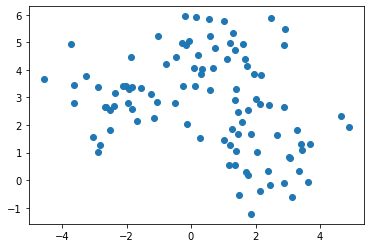

In [30]:
plt.scatter(X[:,0], X[:,1])

In [40]:
k = 3
centroids = X[np.random.randint(0,X.shape[0], size=k)] 
labels = np.argmin(cdist(X, centroids), axis=1)
print(labels)

[2 0 2 0 0 2 2 0 1 2 0 2 1 0 0 2 1 1 0 2 2 2 1 1 1 2 1 2 2 1 2 2 2 0 0 0 0
 2 2 0 2 0 0 0 1 2 1 2 1 0 2 1 2 2 2 0 1 0 2 0 1 1 2 2 2 2 2 0 1 2 2 1 2 0
 2 2 2 1 2 1 2 0 0 2 0 0 2 1 2 1 2 1 2 2 2 2 1 1 1 1]


In [77]:
def fit(X, k) :
    
    # Choose k centroids
    centroids = X[np.random.randint(0, X.shape[0], size=k)]
    labels = np.argmin(cdist(X, centroids), axis=1)
    
    for i in range(10) :
        previous_labels = labels.copy()
        
        centroids = np.array([np.mean(X[labels == r], axis=0) for r in range(k)])
        labels = np.argmin(cdist(X, centroids), axis=1)
        print("\nITERATION ", i, " : \n\nCentroids : \n", centroids, "\n\nLabels : \n", labels)
        
        if all(labels == previous_labels) :
            break
            
    return centroids, labels

In [78]:
centroids, labels = fit(X, cluster_count)


ITERATION  0  : 

Centroids : 
 [[-0.09639443  5.2844802 ]
 [-1.57940333  2.54358107]
 [ 2.04319072  2.58606537]] 

Labels : 
 [1 2 1 2 2 0 1 2 2 1 2 0 2 2 2 1 2 0 2 0 0 1 0 2 0 1 0 1 0 2 0 2 0 2 2 2 2
 1 2 2 1 2 2 2 0 0 0 1 0 2 1 2 1 1 1 2 2 2 2 2 0 2 2 0 1 1 1 2 0 1 1 2 1 2
 1 1 1 0 1 2 0 2 2 1 2 2 1 2 1 2 1 0 0 2 1 0 2 0 2 2]

ITERATION  1  : 

Centroids : 
 [[ 0.45703734  4.85547576]
 [-2.21827025  2.89050344]
 [ 2.23877051  1.6963336 ]] 

Labels : 
 [1 2 1 2 2 0 1 2 0 1 2 0 0 2 2 1 2 0 2 0 0 1 0 0 0 1 0 1 0 2 0 2 0 2 2 2 2
 1 2 2 1 2 2 2 0 0 0 1 0 2 1 2 1 0 1 2 2 2 2 2 0 0 0 0 1 1 1 2 0 1 1 0 1 2
 1 1 1 0 1 2 0 2 2 1 2 2 1 2 1 2 1 0 0 2 1 0 2 0 0 0]

ITERATION  2  : 

Centroids : 
 [[ 0.78907845  4.63901151]
 [-2.2866262   2.87292917]
 [ 2.30728428  1.18093529]] 

Labels : 
 [1 2 1 2 2 0 1 2 0 1 2 0 0 2 2 1 2 0 2 0 0 1 0 0 0 1 0 1 0 2 0 2 0 2 2 2 2
 1 2 2 1 2 2 2 0 0 0 1 0 2 1 2 1 0 1 2 2 2 2 2 0 0 0 0 1 1 1 2 0 1 1 0 1 2
 1 1 1 0 1 0 0 2 2 1 2 2 1 2 1 2 1 0 0 2 1 0 2 0 0 0]

ITE

In [79]:
print("CENTROIDS : \n", centroids)
print("\nLABELS : \n", labels)

CENTROIDS : 
 [[ 0.80635337  4.58788173]
 [-2.2866262   2.87292917]
 [ 2.33244263  1.13445789]]

LABELS : 
 [1 2 1 2 2 0 1 2 0 1 2 0 0 2 2 1 2 0 2 0 0 1 0 0 0 1 0 1 0 2 0 2 0 2 2 2 2
 1 2 2 1 2 2 2 0 0 0 1 0 2 1 2 1 0 1 2 2 2 2 2 0 0 0 0 1 1 1 2 0 1 1 0 1 2
 1 1 1 0 1 0 0 2 2 1 2 2 1 2 1 2 1 0 0 2 1 0 2 0 0 0]
